   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.9 MB/s eta 0:00:21
   ---------------------------------------- 0.1/38.8 MB 1.7 MB/s eta 0:00:24
   ---------------------------------------- 0.1/38.8 MB 1.7 MB/s eta 0:00:24
   ---------------------------------------- 0.1/38.8 MB 535.8 kB/s eta 0:01:13
   ---------------------------------------- 0.3/38.8 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.3/38.8 MB 1.2 MB/s eta 0:00:33
   ---------------------------------------- 0.4/38.8 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.4/38.8 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.4/38.8 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.4/38.8 MB 1.4 MB/s eta 0:00:28
    --------------------------------------- 0.5/38.8 MB 1.0 MB/s eta 0:00:38
    --------------------------------------- 0.6/38.8 MB 1.1 MB/s eta 0:00:37
    


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


91771/91771 ━━━━━━━━━━━━━━━━━━━━ 1s 8us/step


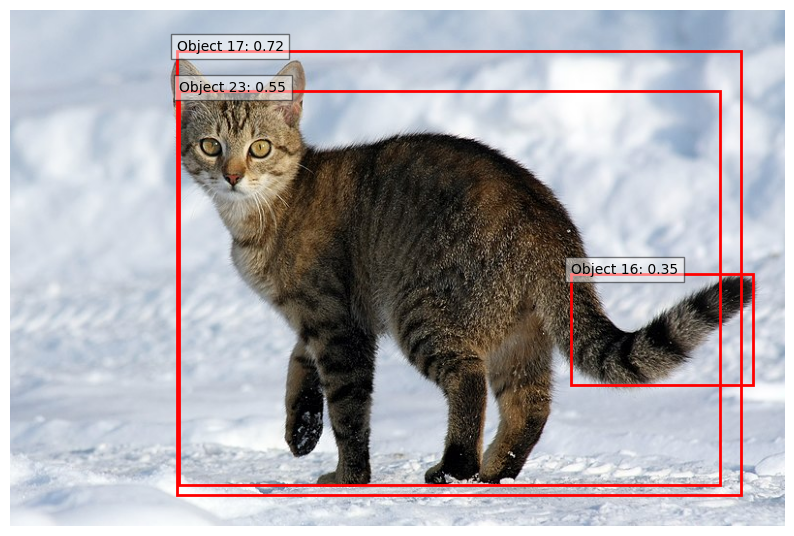

In [5]:


import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
!pip install opencv-python
import cv2

# Load a pre-trained object detection model from TensorFlow Hub
model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
detector = hub.load(model_url)

# Load an internet image for testing
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Felis_catus-cat_on_snow.jpg/800px-Felis_catus-cat_on_snow.jpg"  # Example image URL
image_path = tf.keras.utils.get_file("test_image.jpg", origin=image_url)

# Load and preprocess the image
def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (320, 320))
    return np.array(img), np.array(img_resized)

# Run detection on the image
def run_detector(detector, image):
    image_tensor = tf.convert_to_tensor([image], dtype=tf.uint8)
    detections = detector(image_tensor)
    return detections

# Visualization function to show bounding boxes and labels
def display_detections(original_image, resized_image, detections, threshold=0.3):
    plt.figure(figsize=(10, 10))
    plt.imshow(original_image)
    ax = plt.gca()

    # Iterate through the detections
    for i in range(detections['detection_scores'][0].numpy().size):
        score = detections['detection_scores'][0][i].numpy()
        if score < threshold:
            continue

        bbox = detections['detection_boxes'][0][i].numpy()
        label = int(detections['detection_classes'][0][i].numpy())
        label_name = f"Object {label}"  # Use COCO label names if available

        # Get box coordinates
        h, w, _ = original_image.shape
        y_min, x_min, y_max, x_max = bbox
        (left, right, top, bottom) = (x_min * w, x_max * w, y_min * h, y_max * h)

        # Draw bounding box
        ax.add_patch(plt.Rectangle((left, top), right - left, bottom - top,
                                   edgecolor='red', fill=False, linewidth=2))
        ax.text(left, top, f'{label_name}: {score:.2f}', 
                bbox={'facecolor': 'white', 'alpha': 0.5}, 
                clip_box=ax.clipbox, clip_on=True)

    plt.axis("off")
    plt.show()

# Example usage
original_image, resized_image = load_image(image_path)
detections = run_detector(detector, resized_image)
display_detections(original_image, resized_image, detections)